In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7f979afa7245dc4c3241877486623a4


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | ulladulla
Processing Record 2 of Set 13 | yellowknife
Processing Record 3 of Set 13 | bredasdorp
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | khatanga
Processing Record 6 of Set 13 | adrar
Processing Record 7 of Set 13 | mahebourg
Processing Record 8 of Set 13 | fredericksburg
Processing Record 9 of Set 13 | batagay
Processing Record 10 of Set 13 | dikson
Processing Record 11 of Set 13 | gigmoto
Processing Record 12 of Set 13 | port alfred
Processing Record 13 of Set 13 | swift current
Processing Record 14 of Set 13 | hilo
Processing Record 15 of Set 13 | eureka
Processing Record 16 of Set 13 | sheopur
Processing Record 17 of Set 13 | pevek
Processing Record 18 of Set 13 | aflu
City not found. Skipping...
Processing Record 19 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 13 | pemba
Processing Record 21 of Set 13 | mezen
Processing Record 22 of Set 13 | tual
Processing Record 23 of Set 13 | carnar

Processing Record 37 of Set 16 | asau
Processing Record 38 of Set 16 | sao filipe
Processing Record 39 of Set 16 | eyl
Processing Record 40 of Set 16 | lasa
Processing Record 41 of Set 16 | gamba
Processing Record 42 of Set 16 | saleaula
City not found. Skipping...
Processing Record 43 of Set 16 | itarema
Processing Record 44 of Set 16 | moranbah
Processing Record 45 of Set 16 | luba
Processing Record 46 of Set 16 | ituni
City not found. Skipping...
Processing Record 47 of Set 16 | mount gambier
Processing Record 48 of Set 16 | geresk
City not found. Skipping...
Processing Record 49 of Set 16 | tessalit
Processing Record 50 of Set 16 | kasempa
Processing Record 1 of Set 17 | lompoc
Processing Record 2 of Set 17 | the valley
Processing Record 3 of Set 17 | farmington
Processing Record 4 of Set 17 | jalu
Processing Record 5 of Set 17 | port hardy
Processing Record 6 of Set 17 | areosa
Processing Record 7 of Set 17 | hobyo
Processing Record 8 of Set 17 | marcona
City not found. Skipping..

Processing Record 27 of Set 20 | ust-karsk
Processing Record 28 of Set 20 | cam ranh
Processing Record 29 of Set 20 | dali
Processing Record 30 of Set 20 | salinas
Processing Record 31 of Set 20 | tooele
Processing Record 32 of Set 20 | nacala
Processing Record 33 of Set 20 | graciano sanchez
Processing Record 34 of Set 20 | puerto madryn
Processing Record 35 of Set 20 | rosarito
Processing Record 36 of Set 20 | barranca
Processing Record 37 of Set 20 | torrevieja
Processing Record 38 of Set 20 | souillac
Processing Record 39 of Set 20 | torquay
Processing Record 40 of Set 20 | ancud
Processing Record 41 of Set 20 | concarneau
Processing Record 42 of Set 20 | golaghat
Processing Record 43 of Set 20 | san quintin
Processing Record 44 of Set 20 | lebedinyy
Processing Record 45 of Set 20 | mirnyy
Processing Record 46 of Set 20 | marsh harbour
Processing Record 47 of Set 20 | ybbs
City not found. Skipping...
Processing Record 48 of Set 20 | egvekinot
Processing Record 49 of Set 20 | apatit

Processing Record 13 of Set 24 | gobabis
Processing Record 14 of Set 24 | llata
Processing Record 15 of Set 24 | urengoy
Processing Record 16 of Set 24 | dengzhou
Processing Record 17 of Set 24 | putina
Processing Record 18 of Set 24 | deputatskiy
Processing Record 19 of Set 24 | khunti
Processing Record 20 of Set 24 | kargat
Processing Record 21 of Set 24 | chifeng
Processing Record 22 of Set 24 | igarka
Processing Record 23 of Set 24 | mountain home
Processing Record 24 of Set 24 | palana
Processing Record 25 of Set 24 | chapais
Processing Record 26 of Set 24 | kronshtadt
Processing Record 27 of Set 24 | los corrales de buelna
Processing Record 28 of Set 24 | duvan
Processing Record 29 of Set 24 | misratah
Processing Record 30 of Set 24 | naze
Processing Record 31 of Set 24 | fairview
Processing Record 32 of Set 24 | dombarovskiy
Processing Record 33 of Set 24 | wanning
Processing Record 34 of Set 24 | truro
Processing Record 35 of Set 24 | gorontalo
Processing Record 36 of Set 24 | 

In [17]:
len(city_data)

599

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ulladulla,-35.35,150.47,53.60,71,90,8.05,AU,2020-11-07 19:53:30
1,Yellowknife,62.46,-114.35,12.00,85,90,5.82,CA,2020-11-07 19:47:44
2,Bredasdorp,-34.53,20.04,64.40,48,0,16.11,ZA,2020-11-07 19:49:39
3,Rikitea,-23.12,-134.97,71.33,73,53,18.25,PF,2020-11-07 19:49:17
4,Khatanga,71.97,102.50,-4.45,87,9,12.57,RU,2020-11-07 19:49:26
5,Adrar,20.50,-10.07,87.01,17,97,10.38,MR,2020-11-07 19:49:19
6,Mahebourg,-20.41,57.70,73.40,78,20,8.05,MU,2020-11-07 19:45:39
7,Fredericksburg,38.30,-77.46,77.00,38,1,1.83,US,2020-11-07 19:53:25
8,Batagay,67.63,134.63,-26.68,84,43,1.45,RU,2020-11-07 19:55:01
9,Dikson,73.51,80.55,-2.60,89,33,11.83,RU,2020-11-07 19:49:31


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]

In [20]:
city_data_df = city_data_df[new_column_order]

In [21]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ulladulla,AU,2020-11-07 19:53:30,-35.35,150.47,53.60,71,90,8.05
1,Yellowknife,CA,2020-11-07 19:47:44,62.46,-114.35,12.00,85,90,5.82
2,Bredasdorp,ZA,2020-11-07 19:49:39,-34.53,20.04,64.40,48,0,16.11
3,Rikitea,PF,2020-11-07 19:49:17,-23.12,-134.97,71.33,73,53,18.25
4,Khatanga,RU,2020-11-07 19:49:26,71.97,102.50,-4.45,87,9,12.57
5,Adrar,MR,2020-11-07 19:49:19,20.50,-10.07,87.01,17,97,10.38
6,Mahebourg,MU,2020-11-07 19:45:39,-20.41,57.70,73.40,78,20,8.05
7,Fredericksburg,US,2020-11-07 19:53:25,38.30,-77.46,77.00,38,1,1.83
8,Batagay,RU,2020-11-07 19:55:01,67.63,134.63,-26.68,84,43,1.45
9,Dikson,RU,2020-11-07 19:49:31,73.51,80.55,-2.60,89,33,11.83


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604779157.7347102

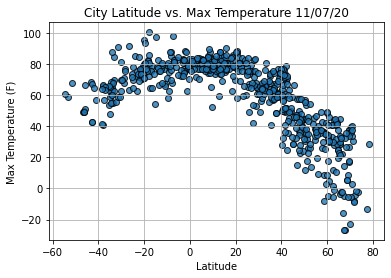

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

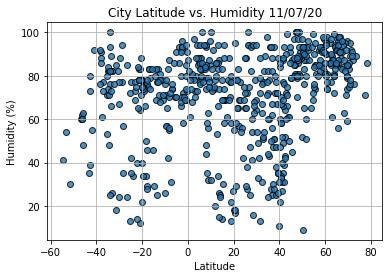

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

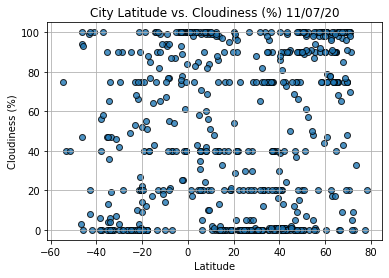

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

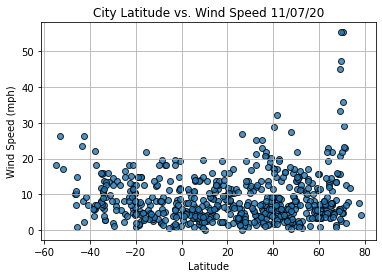

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()